<a href="https://colab.research.google.com/github/djdtimit/Deep-Learning/blob/master/Classifying_newswires_(Reuters)_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying newswires from Reuters

## the dataset

In [1]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [4]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [5]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [6]:
len(train_data)

8982

In [7]:
len(test_data)

2246

In [8]:
len(set(train_labels))

46

In [9]:
set(train_labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45}

## Preparing the data

In [0]:
import numpy as np

In [0]:
def vectorice_sequences(sequence, dimension=10000):
  index_matrix = np.zeros((len(sequence), dimension))

  for i, seq in enumerate(sequence):
    index_matrix[i, seq] = 1.0
  return index_matrix

In [0]:
X_train = vectorice_sequences(train_data)
X_test = vectorice_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [15]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the network

In [0]:
from keras import models, layers

In [17]:
model = models.Sequential()
model.add(layer=layers.Dense(units=64,activation='relu', input_shape=(10000,)))
model.add(layer=layers.Dense(units=64,activation='relu'))
model.add(layer=layers.Dense(units=46,activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Validation data

In [0]:
X_val = X_train[:1000]
y_val = one_hot_train_labels[:1000]

X_partial_train = X_train[1000:]
y_partial_train = one_hot_train_labels[1000:]

## Train the model

In [20]:
history = model.fit(x=X_partial_train, y=y_partial_train, batch_size=512,epochs=20,validation_data=(X_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 579us/step - loss: 2.6521 - acc: 0.4840 - val_loss: 1.7225 - val_acc: 0.6470
Epoch 2/20
7982/7982 [==============================] - 1s 64us/step - loss: 1.4201 - acc: 0.7066 - val_loss: 1.3160 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 63us/step - loss: 1.0459 - acc: 0.7820 - val_loss: 1.1204 - val_acc: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.8185 - acc: 0.8285 - val_loss: 1.0436 - val_acc: 0.7990
Epoch 5/20
7982/7982 [==============================] - 0s 61us/step - loss: 0.6577 - acc: 0.8662 - val_loss: 0.9587 - val_acc: 0.8000
Epoch 6/20
7982/7982 [==============================] - 0s 62us/step - loss: 0.5223 - acc: 0.8925 - val_loss: 0.9091 - val_acc: 0.8110
Epoch 7/20
7982/7982 [========================

## Plotting

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
range_epochs = range(1, len(history_dict['loss']) + 1)

In [24]:
range_epochs

range(1, 21)

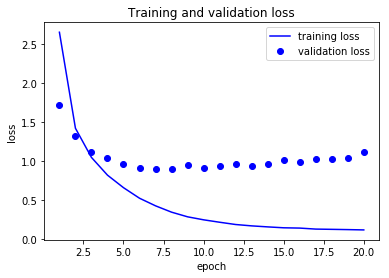

In [25]:
plt.plot(range_epochs, history_dict['loss'],'b', label='training loss')
plt.plot(range_epochs, history_dict['val_loss'], 'bo', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

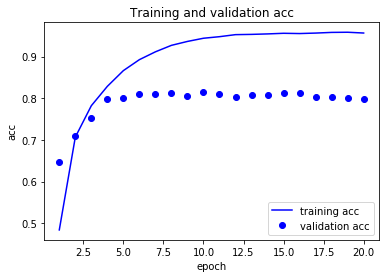

In [26]:
plt.plot(range_epochs, history_dict['acc'],'b', label='training acc')
plt.plot(range_epochs, history_dict['val_acc'], 'bo', label='validation acc')
plt.title('Training and validation acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

## retrain on 9 epochs

In [27]:
model.fit(x=X_train, y=one_hot_train_labels, batch_size=512,epochs=9)

Epoch 1/9
8982/8982 [==============================] - 1s 59us/step - loss: 0.2106 - acc: 0.9414
Epoch 2/9
8982/8982 [==============================] - 1s 58us/step - loss: 0.1697 - acc: 0.9481
Epoch 3/9
8982/8982 [==============================] - 1s 58us/step - loss: 0.1548 - acc: 0.9486
Epoch 4/9
8982/8982 [==============================] - 1s 58us/step - loss: 0.1346 - acc: 0.9530
Epoch 5/9
8982/8982 [==============================] - 1s 57us/step - loss: 0.1294 - acc: 0.9541
Epoch 6/9
8982/8982 [==============================] - 1s 57us/step - loss: 0.1189 - acc: 0.9570
Epoch 7/9
8982/8982 [==============================] - 1s 57us/step - loss: 0.1217 - acc: 0.9557
Epoch 8/9
8982/8982 [==============================] - 1s 57us/step - loss: 0.1140 - acc: 0.9569
Epoch 9/9
8982/8982 [==============================] - 1s 57us/step - loss: 0.1167 - acc: 0.9557


In [28]:
results = model.evaluate(x=X_test, y=one_hot_test_labels)

2246/2246 [==============================] - 0s 91us/step


In [29]:
results

[1.2454336581225918, 0.7880676758682101]

## Predictions on new data

In [0]:
predictions = model.predict(X_test)

In [31]:
predictions

array([[1.8698333e-06, 2.0714793e-05, 1.0925443e-06, ..., 1.0447886e-09,
        2.5731446e-12, 8.4620787e-08],
       [2.0043772e-04, 1.2095858e-02, 8.8654459e-02, ..., 1.6090563e-02,
        1.4859325e-10, 1.0249543e-03],
       [8.8609848e-03, 9.2905235e-01, 5.6959182e-04, ..., 1.9564573e-05,
        1.8244398e-05, 4.6102281e-04],
       ...,
       [8.3360317e-07, 2.3427356e-05, 1.4894030e-07, ..., 3.6356414e-11,
        4.2671580e-10, 1.1680429e-07],
       [3.7473671e-03, 1.8502021e-01, 1.8312879e-03, ..., 5.8646554e-05,
        9.1831026e-07, 1.4579894e-04],
       [9.8530079e-05, 3.8884747e-01, 3.8946770e-02, ..., 2.7254511e-05,
        3.8602175e-06, 3.1612828e-05]], dtype=float32)

In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

0.99999976

In [34]:
np.argmax(predictions[0])

3

## information bottleneck

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=64,activation='relu', input_shape=(10000,)))
model.add(layer=layers.Dense(units=4, activation='relu'))
model.add(layer=layers.Dense(units=46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(x=X_partial_train,y=y_partial_train,batch_size=512,epochs=20,validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 88us/step - loss: 3.3816 - acc: 0.2169 - val_loss: 2.9844 - val_acc: 0.5740
Epoch 2/20
7982/7982 [==============================] - 0s 62us/step - loss: 2.6350 - acc: 0.6061 - val_loss: 2.3537 - val_acc: 0.6180
Epoch 3/20
7982/7982 [==============================] - 0s 61us/step - loss: 2.0374 - acc: 0.6516 - val_loss: 1.9100 - val_acc: 0.6310
Epoch 4/20
7982/7982 [==============================] - 0s 62us/step - loss: 1.6470 - acc: 0.6739 - val_loss: 1.6569 - val_acc: 0.6520
Epoch 5/20
7982/7982 [==============================] - 0s 61us/step - loss: 1.4142 - acc: 0.6944 - val_loss: 1.5083 - val_acc: 0.6730
Epoch 6/20
7982/7982 [==============================] - 1s 63us/step - loss: 1.2617 - acc: 0.7112 - val_loss: 1.4312 - val_acc: 0.6770
Epoch 7/20
7982/7982 [==============================] - 0s 61us/step - loss: 1.1552 - acc: 0.7230 - val_loss: 1.3833 - val_acc: 0.6880
Epoch 8

## 32 units

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=32,activation='relu', input_shape=(10000,)))
model.add(layer=layers.Dense(units=32, activation='relu'))
model.add(layer=layers.Dense(units=46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(x=X_partial_train, y=y_partial_train, batch_size=512,epochs=20,validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 91us/step - loss: 3.0574 - acc: 0.4818 - val_loss: 2.2592 - val_acc: 0.5880
Epoch 2/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.8668 - acc: 0.6477 - val_loss: 1.6195 - val_acc: 0.6590
Epoch 3/20
7982/7982 [==============================] - 0s 58us/step - loss: 1.3945 - acc: 0.7092 - val_loss: 1.3603 - val_acc: 0.6940
Epoch 4/20
7982/7982 [==============================] - 0s 60us/step - loss: 1.1395 - acc: 0.7503 - val_loss: 1.2254 - val_acc: 0.7280
Epoch 5/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.9665 - acc: 0.7897 - val_loss: 1.1336 - val_acc: 0.7480
Epoch 6/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.8284 - acc: 0.8167 - val_loss: 1.0643 - val_acc: 0.7710
Epoch 7/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.7155 - acc: 0.8408 - val_loss: 1.0233 - val_acc: 0.7760
Epoch 8

## 128 units

In [0]:
model = models.Sequential()

In [0]:
model.add(layer=layers.Dense(units=128, activation='relu', input_shape=(10000,)))
model.add(layer=layers.Dense(units=128,activation='relu'))
model.add(layer=layers.Dense(units=46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(x=X_partial_train, y=y_partial_train, batch_size=512,epochs=20, validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 103us/step - loss: 2.2294 - acc: 0.5479 - val_loss: 1.4265 - val_acc: 0.6810
Epoch 2/20
7982/7982 [==============================] - 1s 66us/step - loss: 1.1479 - acc: 0.7496 - val_loss: 1.1157 - val_acc: 0.7470
Epoch 3/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.8032 - acc: 0.8289 - val_loss: 0.9735 - val_acc: 0.7980
Epoch 4/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.5827 - acc: 0.8780 - val_loss: 0.8897 - val_acc: 0.8150
Epoch 5/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.4231 - acc: 0.9131 - val_loss: 0.8573 - val_acc: 0.8270
Epoch 6/20
7982/7982 [==============================] - 1s 68us/step - loss: 0.3330 - acc: 0.9290 - val_loss: 0.8442 - val_acc: 0.8240
Epoch 7/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.2597 - acc: 0.9420 - val_loss: 0.8787 - val_acc: 0.8190
Epoch 

result: the more neurons per layer, the better the val_acc

## one hidden layer

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=64, activation='relu', input_shape=(10000,)))
model.add(layer=layers.Dense(units=46,activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(x=X_partial_train, y=y_partial_train,batch_size=512,epochs=20, validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 92us/step - loss: 2.6006 - acc: 0.5811 - val_loss: 1.7974 - val_acc: 0.6610
Epoch 2/20
7982/7982 [==============================] - 0s 60us/step - loss: 1.4437 - acc: 0.7263 - val_loss: 1.3430 - val_acc: 0.7300
Epoch 3/20
7982/7982 [==============================] - 1s 63us/step - loss: 1.0479 - acc: 0.7912 - val_loss: 1.1406 - val_acc: 0.7650
Epoch 4/20
7982/7982 [==============================] - 0s 61us/step - loss: 0.8170 - acc: 0.8339 - val_loss: 1.0292 - val_acc: 0.7850
Epoch 5/20
7982/7982 [==============================] - 0s 61us/step - loss: 0.6573 - acc: 0.8683 - val_loss: 0.9547 - val_acc: 0.8050
Epoch 6/20
7982/7982 [==============================] - 0s 62us/step - loss: 0.5365 - acc: 0.8946 - val_loss: 0.9107 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 0s 62us/step - loss: 0.4424 - acc: 0.9114 - val_loss: 0.8752 - val_acc: 0.8120
Epoch 8

### three hidden layers

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=64, activation='relu', input_shape=(10000,)))
model.add(layer=layers.Dense(units=64, activation='relu'))
model.add(layer=layers.Dense(units=64, activation='relu'))
model.add(layer=layers.Dense(units=46,activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(x=X_partial_train, y=y_partial_train, batch_size=512,epochs=20,validation_data=(X_partial_train, y_partial_train))

Train on 7982 samples, validate on 7982 samples
Epoch 1/20
7982/7982 [==============================] - 1s 147us/step - loss: 2.7823 - acc: 0.4148 - val_loss: 1.6199 - val_acc: 0.6869
Epoch 2/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.3881 - acc: 0.6994 - val_loss: 1.1362 - val_acc: 0.7494
Epoch 3/20
7982/7982 [==============================] - 1s 105us/step - loss: 1.0392 - acc: 0.7662 - val_loss: 0.8687 - val_acc: 0.8007
Epoch 4/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.8307 - acc: 0.8098 - val_loss: 0.7005 - val_acc: 0.8375
Epoch 5/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.6606 - acc: 0.8548 - val_loss: 0.5535 - val_acc: 0.8812
Epoch 6/20
7982/7982 [==============================] - 1s 102us/step - loss: 0.5205 - acc: 0.8846 - val_loss: 0.4296 - val_acc: 0.9092
Epoch 7/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.4334 - acc: 0.9092 - val_loss: 0.3410 - val_acc: 0.9263


result: the more layers, the better the val_acc